Benchmark su tempi di risposta di richieste http eseguite con i metodi `get` e `head` verso lo stesso endpoint

In [25]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
sns.set_style("whitegrid")

In [59]:
url = 'https://www.immobiliare.it/annunci/101517337/'
limit = 100

In [71]:
def build_df(url, method, limit):
    requests_list = [requests.request(method, url=url, headers={'Cache-Control': 'no-cache'}).elapsed.total_seconds() for i in range(1, limit)]
    return (
        pd.DataFrame(data=requests_list, columns=['seconds'])
            .assign(method=method)
            .assign(step=lambda df: df.index + 1)
    )

In [72]:
df_get_requests = build_df(url, 'get', limit)
df_head_requests = build_df(url, 'head', limit)

In [77]:
df = pd.concat([df_get_requests, df_head_requests])

<Axes: xlabel='method', ylabel='seconds'>

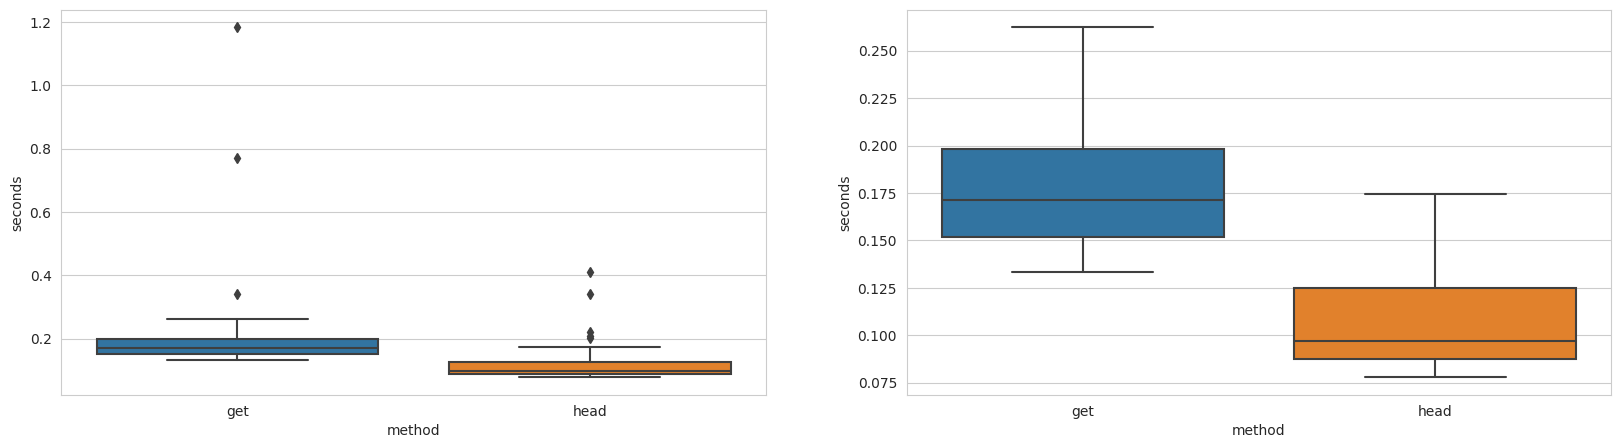

In [85]:
figure, axis = plt.subplots(figsize=(20, 5), ncols=2)
sns.boxplot(data=df, x='method', y='seconds', ax=axis[0])
sns.boxplot(data=df, x='method', y='seconds', ax=axis[1], showfliers=False)

<Axes: xlabel='step', ylabel='seconds'>

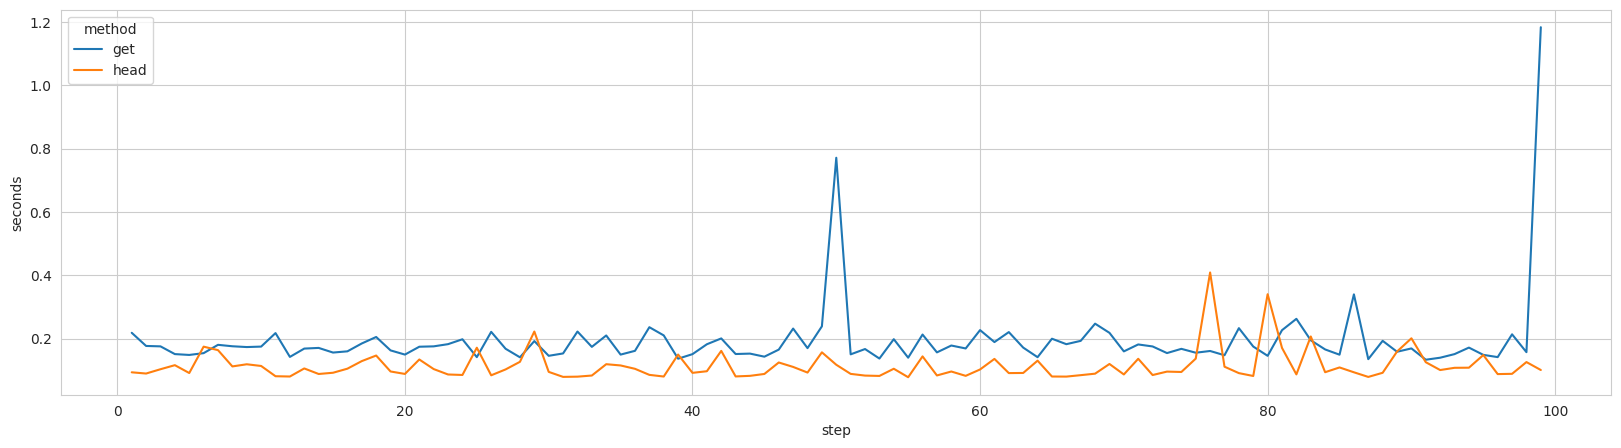

In [79]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='step', y='seconds', hue='method')